In [36]:
import os
import pandas as pd
# import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
from collections import Counter

import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brooks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/brooks/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Challenge 1: Histogram

1. Create a histogram of life expectency across all 142 countries in the gapminder dataset. Play with the `bins=` parameter to find the most informative bin number.

In [3]:
# Set working directory
# %pwd
os.getcwd()

'/Users/brooks/Projects/D-Lab/DIGHUM101-2021/Notebooks/Challenges/Week2'

In [4]:
# Change working directory
os.chdir("../../../Data/")
os.getcwd()

'/Users/brooks/Projects/D-Lab/DIGHUM101-2021/Data'

In [5]:
# List files in working directory
%ls

Geo/                          feminism.xml
childrens_lit.csv             frankenstein.txt
correspondence-data-1585.csv  gapminder-FiveYearData.csv
dracula.txt                   human-rights/
example.json                  iris.csv
example.xml                   music_reviews.csv
feminism.json


In [7]:
gap = pd.read_csv("gapminder-FiveYearData.csv")
print(gap.shape)
gap.head()

(1704, 6)


,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


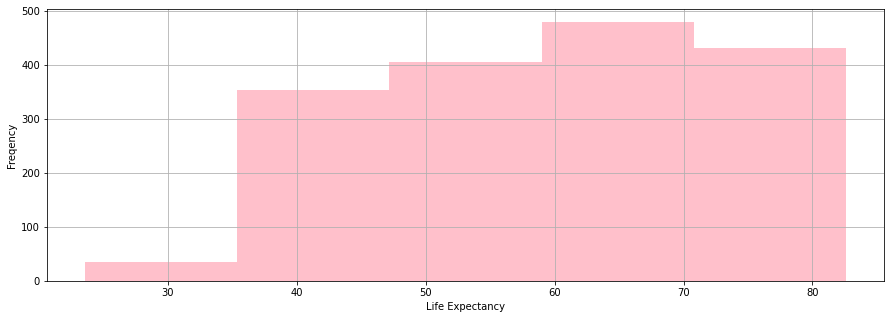

In [20]:
gap['lifeExp'].hist(bins = 5, figsize = (15, 5), color = "pink")
plt.xlabel("Life Expectancy")
plt.ylabel("Freqency");

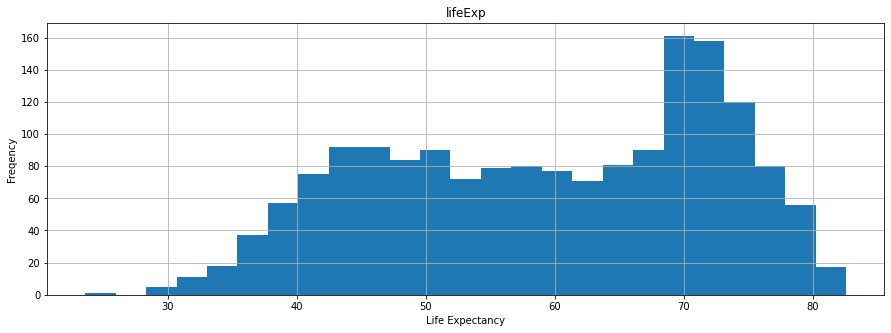

In [16]:
gap.hist(column="lifeExp", bins=25, figsize = (15, 5))


# Challenge 2: Bar plot

Make a bar plot for the 20 most frequently occuring words found in "fiji2014.txt"

In [23]:
%ls

Geo/                          feminism.xml
childrens_lit.csv             frankenstein.txt
correspondence-data-1585.csv  gapminder-FiveYearData.csv
dracula.txt                   human-rights/
example.json                  iris.csv
example.xml                   music_reviews.csv
feminism.json


In [26]:
os.chdir("human-rights")

In [27]:
%pwd

'/Users/brooks/Projects/D-Lab/DIGHUM101-2021/Data/human-rights'

In [28]:
%ls

afghanistan2014.txt   fiji2014.txt          sanmarino2014.txt
bangladesh2013.txt    jordan2013.txt        turkmenistan2013.txt
cotedivoire2014.txt   kazakhstan2014.txt    tuvalu2013.txt
djibouti2013.txt      monaco2013.txt


In [34]:
fiji = open("fiji2014.txt", encoding = "utf-8").read()

How would this visualization change if you first removed the stopwords? 

In [42]:
fiji_tokens = fiji.split()
word_freq = Counter(fiji_tokens)
words = word_freq.most_common(20)

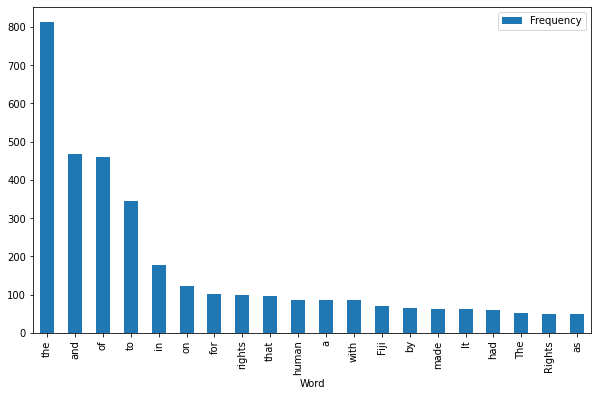

In [45]:
fiji_df = pd.DataFrame(data = words, columns = ["Word", "Frequency"])
fiji_df.plot.bar(x = "Word", y = "Frequency", figsize = (10,6));

# Challenge 3: Understanding Seaborn Code

Matplotlib is good, but seaborn is better! We can do more with less code - you might even find the syntax a little easier to understand. [Start looking through examples here](https://seaborn.pydata.org/tutorial.html).

What can you understand from the code for the [seaborn scatterplot documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)? **_Why_** does the code in the below cell produce the figure that it does? Experiemnt by changing the various arguments and see what happens!

The code below shows a scatterplot for life expectancy and GDP per capita income from the gapminder dataset.

In [ ]:
gap.columns

In [ ]:
scatterplot = sns.scatterplot(x = "lifeExp", y = "gdpPercap", 
                              hue = "continent", style = "continent", 
                              s = 100, alpha = 0.05, data = gap)
scatterplot.legend(loc = "center left", bbox_to_anchor = (0, 0.7), ncol = 1)
scatterplot.set(xlabel = "Life Expectancy (years)", 
                ylabel = "GDP Per Cap Income (USD)", 
                title = "Scatterplot");

# Challenge 4: Faceting

Facet out each of the five continents into its own facetted plot in the variable `scatterplot` from above like so:

In [ ]:
scatterplot_facet = sns.FacetGrid(gap, col = "continent", 
                                  col_wrap = 3, height = 4, sharex = False)
scatterplot_facet.map(plt.scatter, "gdpPercap", "lifeExp", marker = ".");

# Challenge 5: Seaborn Boxplot

Make boxplots for each Species (x-axis) by Petal.Length (Y-axis) in the iris dataset.

In [ ]:
## YOUR CODE HERE

# Challenge 6: Line plot

What if we are interested in _something_ and how it has changed through time? Line plots are the standard for doing so - let's look at change in per-capita GDP through time for Mexico, USA, and Canada. 

In [ ]:
## YOUR CODE HERE

# Challenge 7: Subplots

Create one compoud plot that contains to line plots for Mexico's and Canada's gdpPercap through time!

Combine these into a single figure. 

Save this figure to your working directory, name it "compound_figure.pdf" at 600 dpi. Did it work? 

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(mexico["year"], mexico["gdpPercap"], label = "Mexico", color = "green")
plt.title('Mexico')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

plt.subplot(1,2,2)
plt.plot(canada['year'], canada['gdpPercap'], label='Canada', color='red')
plt.title('Canada')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend()
plt.savefig("compound_figure.pdf", dpi = 600);